<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png"  width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction

Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones.

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage.

Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

<a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01" target="_blank">Spacex DataSet</a>


### Store the dataset in database table

**it is highly recommended to manually load the table using the database console LOAD tool in DB2**.

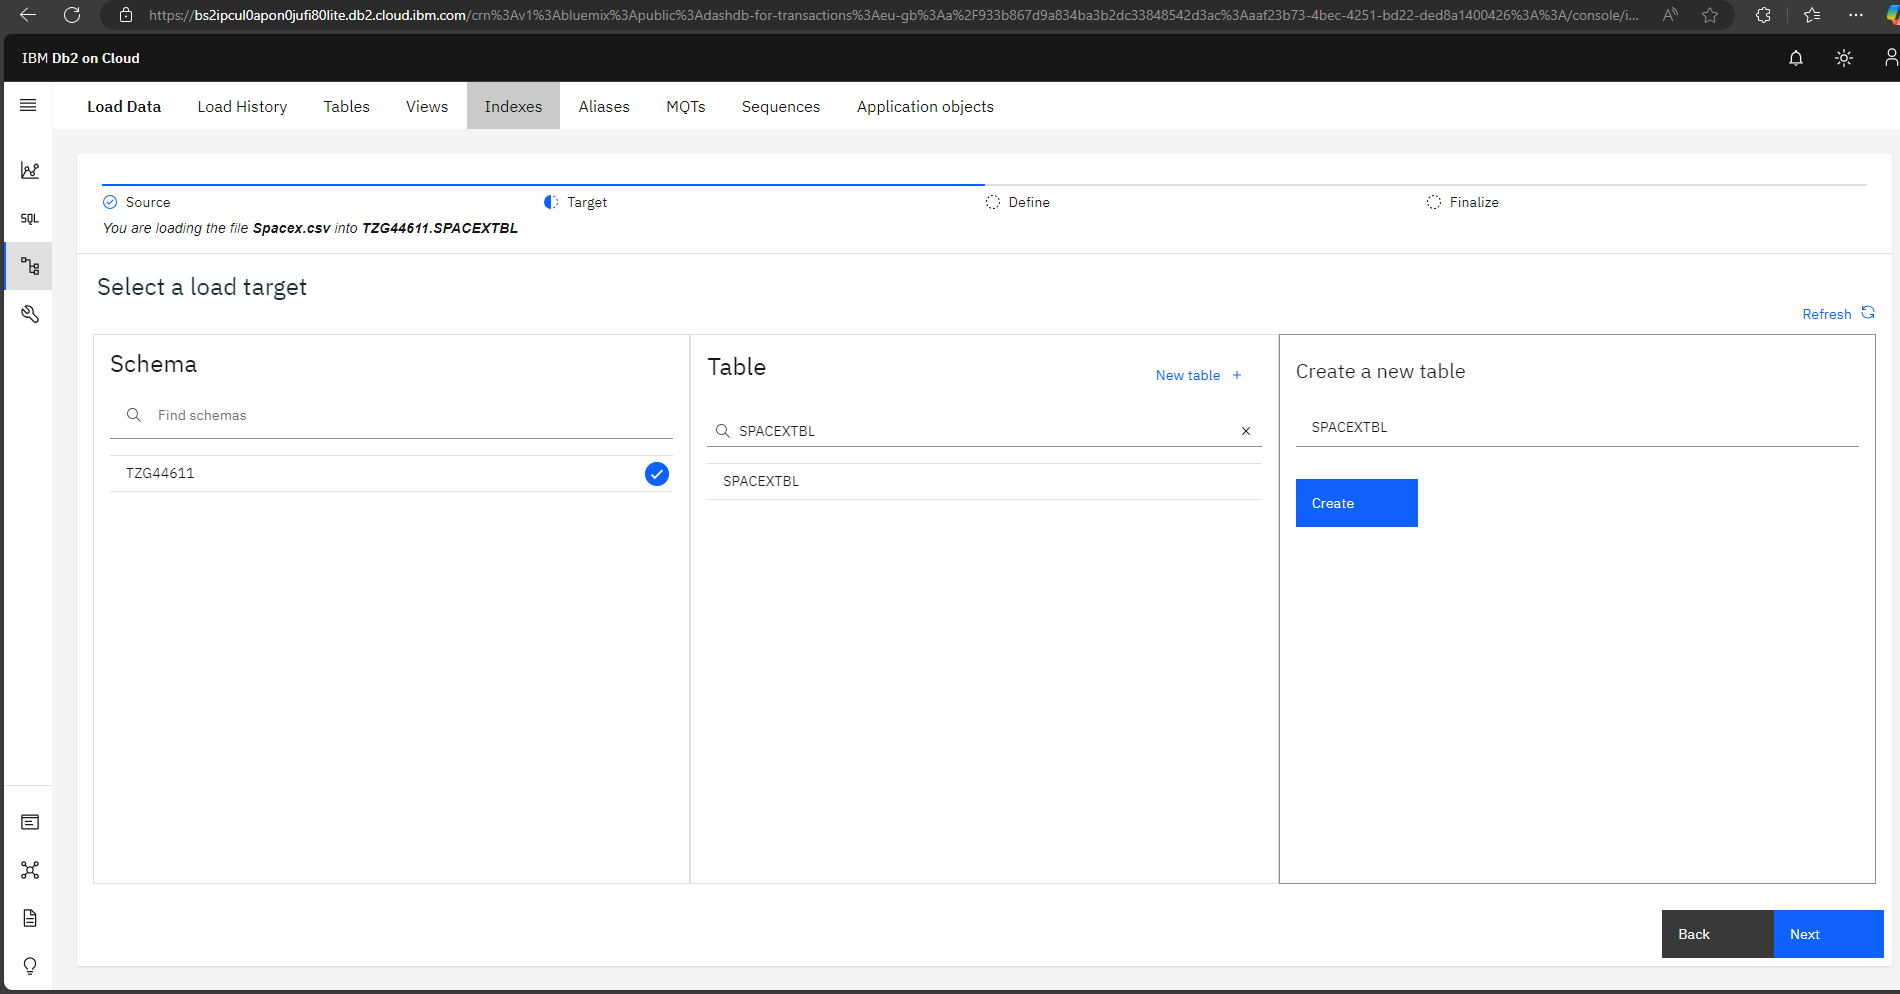

Now open the Db2 console, open the LOAD tool, Select / Drag the .CSV file for the  dataset, Next create a New Table, and then follow the steps on-screen instructions to load the data. Name the new table as follows:

**SPACEXDATASET**

**Follow these steps while using old DB2 UI which is having Open Console Screen**

**Note:While loading Spacex dataset, ensure that detect datatypes is disabled. Later click on the pencil icon(edit option).**

1.  Change the Date Format by manually typing DD-MM-YYYY and timestamp format as DD-MM-YYYY HH\:MM:SS.

    Here you should place the cursor at Date field and manually type as DD-MM-YYYY.

2.  Change the PAYLOAD_MASS\_\_KG\_  datatype  to INTEGER.

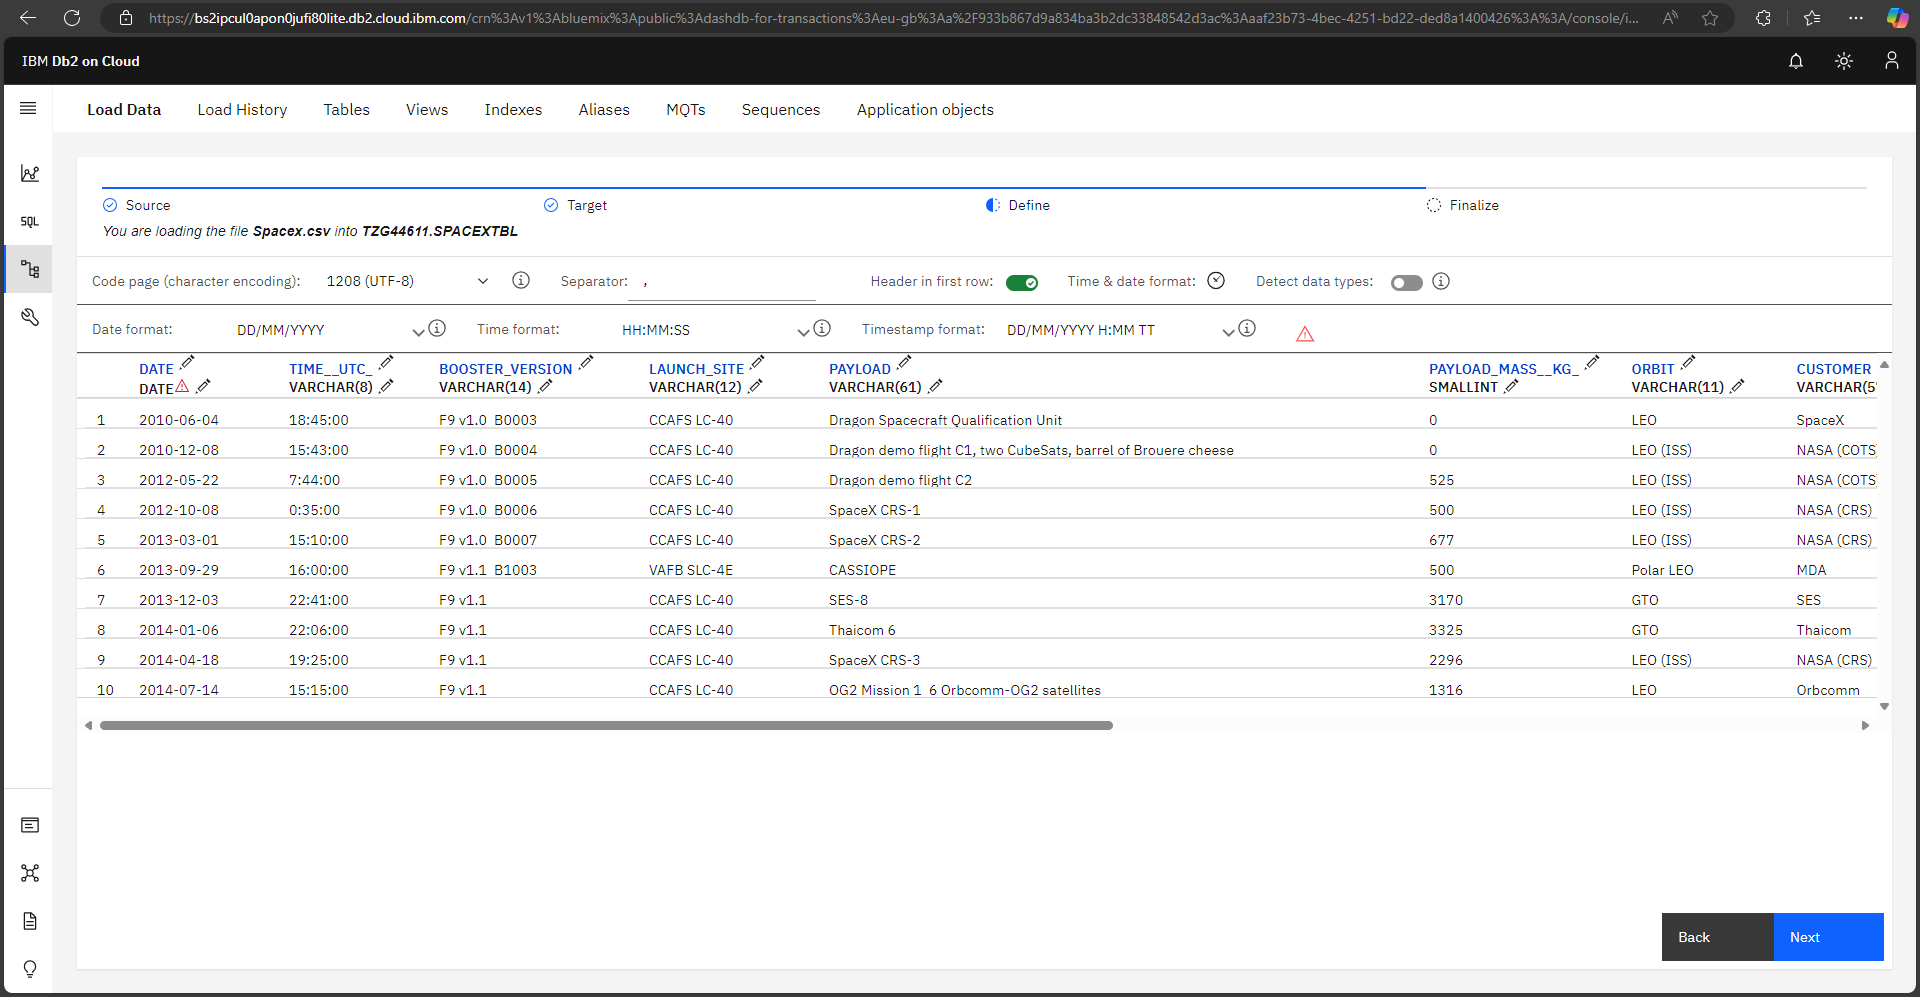


In [ ]:
# !pip install --user sqlalchemy==1.3.9
# !pip install ibm_db_sa
# !pip install ipython-sql

### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [ ]:
%load_ext sql

**DB2 magic in case of old UI service credentials.**

In the next cell enter your db2 connection string. Recall you created Service Credentials for your Db2 instance before. From the **uri** field of your Db2 service credentials copy everything after db2:// (except the double quote at the end) and paste it in the cell below after ibm_db_sa://

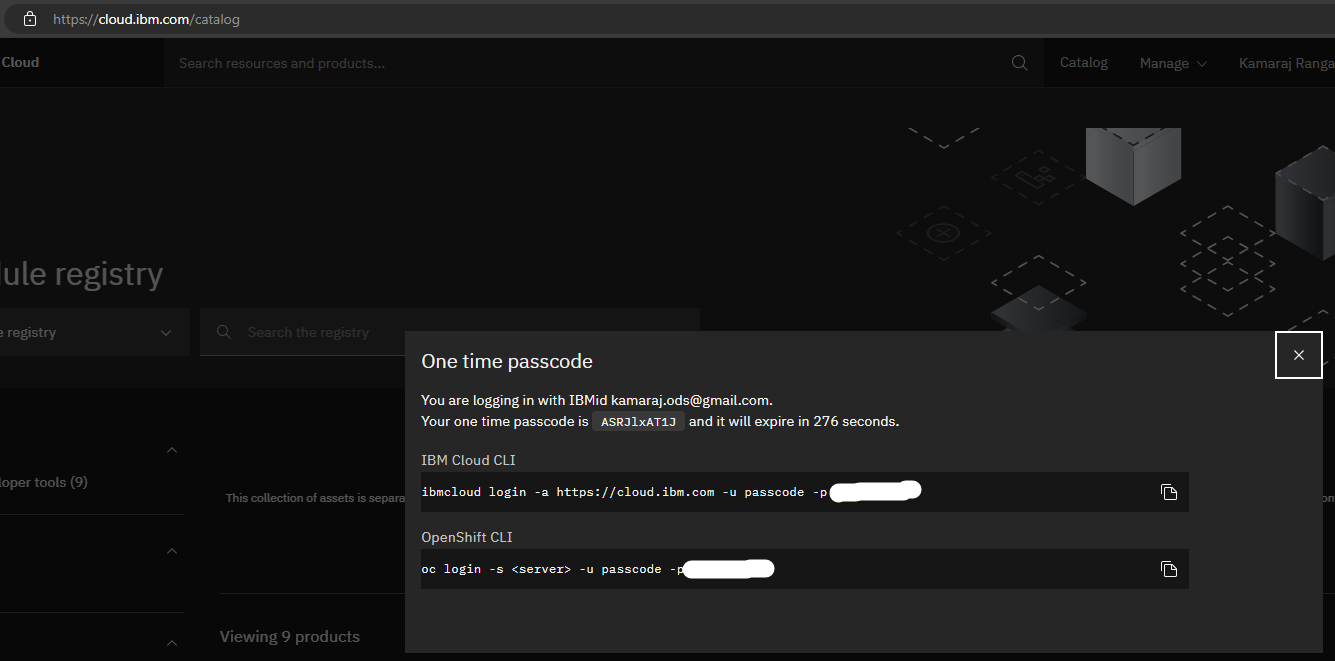

in the following format

**%sql ibm_db_sa://my-username:my-password\@my-hostname:my-port/my-db-name**

**DB2 magic in case of new UI service credentials.**


*   Use the following format.

*   Add security=SSL at the end

**%sql ibm_db_sa://my-username:my-password\@my-hostname:my-port/my-db-name?security=SSL**


In [3]:
%sql ibm_db_sa://

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

### Task 1

##### Display the names of the unique launch sites  in the space mission


In [4]:
%%sql
select unique(LAUNCH_SITE) from SPACEXTBL

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


launch_site
CCAFS LC-40
CCAFS SLC-40
KSC LC-39A
VAFB SLC-4E


### Task 2

##### Display 5 records where launch sites begin with the string 'CCA'


In [5]:
%%sql
select * from SPACEXTBL where LAUNCH_SITE like 'CCA%' limit(5)

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


DATE,time__utc_,booster_version,launch_site,payload,payload_mass__kg_,orbit,customer,mission_outcome,landing_outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3

##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [6]:
%%sql
select SUM(payload_mass__kg_) 
from SPACEXTBL
where customer='NASA (CRS)'

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


1
45596


### Task 4

##### Display average payload mass carried by booster version F9 v1.1


In [7]:
%%sql
select avg(payload_mass__kg_) 
from SPACEXTBL
where booster_version like 'F9 v1.1'

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


1
2928


### Task 5

##### List the date when the first successful landing outcome in ground pad was acheived.

*Hint:Use min function*


In [8]:
%%sql
select min(DATE)
from SPACEXTBL
where Landing_Outcome = 'Success (ground pad)'

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


1
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [9]:
%%sql
select booster_version 
from SPACEXTBL
where Landing_Outcome = 'Success (drone ship)'
    and payload_mass__kg_ between 4000 and 6000

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


booster_version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### Task 7

##### List the total number of successful and failure mission outcomes


In [10]:
%%sql
select mission_outcome, count(mission_outcome)
from SPACEXTBL
group by mission_outcome

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


mission_outcome,2
Failure (in flight),1
Success,99
Success (payload status unclear),1


### Task 8

##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [11]:
%%sql
select booster_version 
from SPACEXTBL
where payload_mass__kg_ in (select max(payload_mass__kg_) from SPACEXTBL)

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


booster_version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


### Task 9

##### List the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015


In [12]:
%%sql
select Landing_Outcome, booster_version, launch_site 
from SPACEXTBL
where Landing_Outcome= 'Failure (drone ship)'
    and EXTRACT(YEAR FROM DATE)=2015

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


landing_outcome,booster_version,launch_site
Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


### Task 10

##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order


In [13]:
%%sql
select Landing_Outcome, count(Landing_Outcome) as total
from SPACEXTBL
where DATE between '2010-06-04' and '2017-03-20'
group by Landing_Outcome
order by total DESC

 * ibm_db_sa://ggm09243:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/bludb;security=SSL
Done.


landing_outcome,total
No attempt,10
Failure (drone ship),5
Success (drone ship),5
Controlled (ocean),3
Success (ground pad),3
Failure (parachute),2
Uncontrolled (ocean),2
Precluded (drone ship),1


### Reference Links

*   <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01&origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>

*   <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01&origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*   <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01&origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*   <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Hands-on Lab: Analyzing a real World Data Set</a>


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
